## Move correct folder

In [5]:
%cd generation

/mnt/d/deepface-video-recognition/generation


## IMPORT LIB

In [6]:
from deepface import DeepFace
from concurrent.futures import ThreadPoolExecutor

import os
import pickle
import numpy as np
import faiss
import queue
import threading
import cv2
import matplotlib.pyplot as plt

## Search shot file from index

In [9]:
chosen_face_det = "fastmtcnn"
chosen_character = "willis"
chosen_emb_model = "ArcFace"
chosen_movie = "Memphis"
chosen_avatar_emb_path = f"../data/character_emb_query/{chosen_movie}/{chosen_emb_model}/{chosen_character}/{chosen_character}_1.pkl"
faiss_index_emb_path = f"../data/faiss_index/{chosen_movie}/{chosen_emb_model}/movie_{chosen_movie}-det_{chosen_face_det}-emb_{chosen_emb_model}.pkl"
read_files_emb_path = f"../data/faiss_index/{chosen_movie}/{chosen_emb_model}/read-movie_{chosen_movie}-det_{chosen_face_det}-emb_{chosen_emb_model}.pkl"
k_relevant = 10
with open(chosen_avatar_emb_path, "rb") as f:
    query_embedding = pickle.load(f)
with open(read_files_emb_path, "rb") as f:
    read = pickle.load(f)

index = faiss.read_index(faiss_index_emb_path)


In [10]:
def extract_unique_names(filenames: list):
    # Extract unique prefixes
    unique_prefixes = set()
    for filename in filenames:
        prefix = filename.split("-frame_")[0]
        unique_prefixes.add(prefix)

    # Convert the set to a list if needed
    unique_list = list(unique_prefixes)

    return unique_list

In [11]:
def show_img(img_path):
    print(img_path)
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [12]:
distances, indices = index.search(query_embedding, k=k_relevant)
print('distances', distances, 'indices', indices)

distances [[1.6984673 1.8171284 1.9981639 2.3800247 2.4313226 2.959065  3.1165247
  3.1292152 3.1760364 3.2846994]] indices [[1774 1773 1772 1775 1771 1759 1776 1728 1756 1755]]


In [13]:
def show_detected_faces(model, indices, read, chosen_avatar_emb_path):
    chosen_avatar_path = chosen_avatar_emb_path.replace("character_emb_query", "character_query").replace("pkl", "jpg").replace(f"-emb_{model}-", "-").replace(f"/{chosen_emb_model}/", "/")
    show_img(chosen_avatar_path)
    for i in indices[0]:
        pickle_file_path = read[i]
        print(pickle_file_path)
        image_path = pickle_file_path.replace("faces_emb", "faces").replace("pkl", "jpg").replace(f"-emb_{model}", "")
        show_img(image_path)
        # print(image_path)

../data/character_query/Memphis/willis/willis_1.jpg


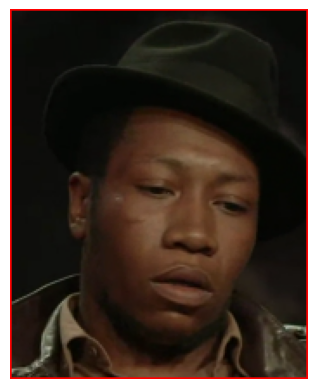

../faces_emb/Memphis/Memphis-2/Memphis-2-shot_3/Memphis-2-shot_3-frame_596-det_fastmtcnn-emb_ArcFace-face_1.pkl
../faces/Memphis/Memphis-2/Memphis-2-shot_3/Memphis-2-shot_3-frame_596-det_fastmtcnn-face_1.jpg


[ WARN:0@494.974] global loadsave.cpp:241 findDecoder imread_('../faces/Memphis/Memphis-2/Memphis-2-shot_3/Memphis-2-shot_3-frame_596-det_fastmtcnn-face_1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [14]:
show_detected_faces(chosen_emb_model, indices, read, chosen_avatar_emb_path)